# Data Visualization Project on Serie A Current Players

## 1. Read Essential Libraries

In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy
import seaborn as sns

## 2. Scraping data using the method we used on Premier League

In [2]:
def Team(sequence):
    #Things we need (Name, Value, Age, Position, Number, Team)
    Player_List = []
    Value_List = []
    Age_List = []
    Position_List = []
    Number_List = []
    Team_List = []
    headers = {'User-Agent': 
           'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36'}
    for i in range(len(sequence)):
        e = sequence[i]
        # Scraping
        pageTree = requests.get(e, headers=headers)
        pageSoup = BeautifulSoup(pageTree.content, 'html.parser')
        Players = pageSoup.find_all("td", {"class": "hide"})
        Values = pageSoup.find_all("td", {"class": "rechts hauptlink"})
        Age = pageSoup.find_all("td", {"class": "zentriert"})
        Position = pageSoup.find_all("tr")
        Number = pageSoup.find_all("td")
        a = 0
        b = 0 
        c = 1
        d = 4
        e = 3
        while a < len(Players):
            Player_List.append(Players[a].text)
            a = a + 1
            Team_List.append(sequence[i][32:(len(sequence[i])-22)])
        while b < len(Values):
            Value_List.append(Values[b].text)
            b = b + 1
        while c < (1+len(Players)*3):
            Age_List.append(Age[c].text)
            c = c + 3
        while d < (4+len(Players)*3):
            Position_List.append(Position[d].text)
            d = d + 3 
        while e < (3+len(Players)*9):
            Number_List.append(Number[e].text)
            e = e + 9
    # Return these results to dataframe
    Player = pd.DataFrame({'Player':Player_List})
    Value = pd.DataFrame({'Value':Value_List})
    Age = pd.DataFrame({'Age':Age_List})    
    Position = pd.DataFrame({'Position':Position_List})  
    Number = pd.DataFrame({'Number':Number_List})  
    Club = pd.DataFrame({'Club':Team_List})
    return Player, Value, Age, Position, Number, Club

In [3]:
# Scrapping 20 Clubs data
Player,Value,Age, Position, Number, Club = Team(['https://www.transfermarkt.co.uk/atalanta-bergamo/startseite/verein/800',
      'https://www.transfermarkt.co.uk/fc-bologna/startseite/verein/1025',
      'https://www.transfermarkt.co.uk/brescia-calcio/startseite/verein/19',
      'https://www.transfermarkt.co.uk/cagliari-calcio/startseite/verein/1390',
      'https://www.transfermarkt.co.uk/ac-florenz/startseite/verein/430',
      'https://www.transfermarkt.co.uk/fc-genua-1893/startseite/verein/252',
      'https://www.transfermarkt.co.uk/hellas-verona/startseite/verein/276',
      'https://www.transfermarkt.co.uk/inter-mailand/startseite/verein/46',
      'https://www.transfermarkt.co.uk/juventus-turin/startseite/verein/506',
      'https://www.transfermarkt.co.uk/lazio-rom/startseite/verein/398',
      'https://www.transfermarkt.co.uk/us-lecce/startseite/verein/1005',
      'https://www.transfermarkt.co.uk/ac-mailand/startseite/verein/5',
      'https://www.transfermarkt.co.uk/ssc-neapel/startseite/verein/6195',
      'https://www.transfermarkt.co.uk/fc-parma/startseite/verein/130',
      'https://www.transfermarkt.co.uk/as-rom/startseite/verein/12',
      'https://www.transfermarkt.co.uk/uc-sampdoria/startseite/verein/1038',
      'https://www.transfermarkt.co.uk/us-sassuolo/startseite/verein/6574',
      'https://www.transfermarkt.co.uk/spal-2013/startseite/verein/2722',
      'https://www.transfermarkt.co.uk/fc-turin/startseite/verein/416',
      'https://www.transfermarkt.co.uk/udinese-calcio/startseite/verein/410'])

In [4]:
#Join together
SerieA =  Player.join(Value).join(Age).join(Position).join(Number).join(Club)

In [5]:
# Transform player value to float for further analysis
SerieA[['Value']] = pd.concat([Value[col].str.split()
                       .str[0]
                       .str.replace('£','')
                       .str.replace('k','000')
                       .str.replace('m','').astype(float) for col in Value], axis=1)

In [6]:
# Transform value to the same standard (Million £)
Filter = SerieA[SerieA.Value>200].copy(deep=False)
Filter['Value'] = Filter['Value'].div(1000000).round(2)
SerieA[SerieA.Value>200] = Filter

In [7]:
# Transform player birth date and age to age (numeric)
SerieA = SerieA.sort_values('Value',ascending = False).reset_index(drop = 'True')
Age = SerieA['Age'].str[-3:-1]
SerieA['Age'] = Age.astype(int)

In [8]:
# Some names are spelled in a wrong way
SerieA['Club'].unique()

array(['juventus-turin', 'inter-mailan', 'ssc-neapel/', 'lazio-rom',
       'ac-florenz', 'ac-maila', 'as-ro', 'atalanta-bergamo', 'fc-turin',
       'brescia-calci', 'cagliari-calcio/', 'fc-parma', 'udinese-calcio',
       'us-sassuolo/', 'fc-genua-1893', 'fc-bologna/', 'spal-2013/',
       'uc-sampdoria/', 'hellas-verona', 'us-lecce/'], dtype=object)

In [9]:
# Replace them
SerieA.Club.replace(['inter-mailan','ssc-neapel/','lazio-rom','ac-florenz','ac-maila',
                      'as-ro','atalanta-bergamo','fc-turin','brescia-calci','cagliari-calcio/','us-sassuolo/',
                      'fc-genua-1893','fc-bologna/','spal-2013/','uc-sampdoria/','us-lecce/'],
                     ['inter-milan','ssc-napoli','lazio','ac-florentina','ac-milan',
                      'as-roma','atalanta','torino','brescia','cagliari-calcio','us-sassuolo',
                      'genoa','fc-bologna','spal','uc-sampdoria','us-lecce'],inplace=True)

In [10]:
SerieA

,Player,Value,Age,Position,Number,Club
0,Paulo Dybala,76.50,26,Second Striker,10,juventus-turin
1,Lautaro Martínez,72.00,22,Centre-Forward,10,inter-milan
2,Kalidou Koulibaly,67.50,28,Centre-Back,26,ssc-napoli
3,Romelu Lukaku,67.50,26,Centre-Forward,9,inter-milan
4,Cristiano Ronaldo,67.50,34,Left Winger,7,juventus-turin
5,Matthijs de Ligt,67.50,20,Centre-Back,4,juventus-turin
6,Sergej Milinkovic-Savic,63.00,24,Central Midfield,21,lazio
7,Miralem Pjanic,63.00,29,Central Midfield,5,juventus-turin
8,Federico Chiesa,54.00,22,Right Winger,25,ac-florentina
9,Stefan de Vrij,54.00,27,Centre-Back,6,inter-milan


In [11]:
def Citizenship(x):
    headers = {'User-Agent': 
           'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36'}
    Country = []
    i = 0
    while i < len(x.Player):
        player = x.Player[i]
        data = requests.get("https://www.transfermarkt.com/schnellsuche/ergebnis/schnellsuche?query={}&x=0&y=0".format(player),headers=headers) 
        soup = BeautifulSoup(data.text, "lxml")
        hrefs = soup.find_all("img", {"class" : "flaggenrahmen"},alt=True)
        Flag = hrefs[16]['alt']
        Country.append(Flag)
        i = i+1
    return Country

In [12]:
# Scraping nationality
Citizenship = Citizenship(SerieA)

In [13]:
# Join this column to Bundesliga dataset we already have
SerieA = SerieA.join(pd.DataFrame({'Citizenship':Citizenship}))

In [14]:
#Like the errors happened before, some Brazillian and Spainish players only have one simple name, which sometimes can mislead to wrong search result. So I have to change the nationality manually
#Alberto
Alberto = SerieA[SerieA.Player=='Luis Alberto'].copy(deep=False)
Alberto['Citizenship'] = 'Spain'
SerieA[SerieA.Player=='Luis Alberto'] = Alberto
#Danilo
Danilo = SerieA[SerieA.Player=='Danilo'].copy(deep=False)
Danilo['Citizenship'] = 'Brazil'
SerieA[SerieA.Player=='Danilo'] = Danilo
#Pedro
Pedro = SerieA[SerieA.Player=='Pedro'].copy(deep=False)
Pedro['Citizenship'] = 'Brazil'
SerieA[SerieA.Player=='Pedro'] = Pedro
#Samir
Samir = SerieA[SerieA.Player=='Samir'].copy(deep=False)
Samir['Citizenship'] = 'Brazil'
SerieA[SerieA.Player=='Samir'] = Samir
#Igor
Igor = SerieA[SerieA.Player=='Igor'].copy(deep=False)
Igor['Citizenship'] = 'Brazil'
SerieA[SerieA.Player=='Igor'] = Igor
#Igor
Patric = SerieA[SerieA.Player=='Patric'].copy(deep=False)
Patric['Citizenship'] = 'Spain'
SerieA[SerieA.Player=='Patric'] = Patric
#Rômulo
Rômulo = SerieA[SerieA.Player=='Rômulo'].copy(deep=False)
Rômulo['Citizenship'] = 'Italy'
SerieA[SerieA.Player=='Rômulo'] = Rômulo
#Nícolas
Nícolas = SerieA[SerieA.Player=='Nícolas'].copy(deep=False)
Nícolas['Citizenship'] = 'Brazil'
SerieA[SerieA.Player=='Nícolas'] = Nícolas
#Rafael
Rafael = SerieA[SerieA.Player=='Rafael'].copy(deep=False)
Rafael['Citizenship'] = 'Brazil'
SerieA[SerieA.Player=='Rafael'] = Rafael

#### Final Version of Data

In [15]:
pd.set_option('display.max_rows', 10)
SerieA

,Player,Value,Age,Position,Number,Club,Citizenship
0,Paulo Dybala,76.50,26,Second Striker,10,juventus-turin,Argentina
1,Lautaro Martínez,72.00,22,Centre-Forward,10,inter-milan,Argentina
2,Kalidou Koulibaly,67.50,28,Centre-Back,26,ssc-napoli,Senegal
3,Romelu Lukaku,67.50,26,Centre-Forward,9,inter-milan,Belgium
4,Cristiano Ronaldo,67.50,34,Left Winger,7,juventus-turin,Portugal
...,...,...,...,...,...,...,...
536,Lucas Felippe,0.07,19,Central Midfield,18,hellas-verona,Brazil
537,Paolo Cannistrà,0.04,19,Centre-Back,67,spal,Italy
538,Gianmarco Chironi,0.04,22,Goalkeeper,97,us-lecce,Italy
539,Alessandro Berardi,0.04,28,Goalkeeper,22,hellas-verona,Italy


## 3. Data Visualization

#### 10 Most Valuable Player

In [16]:
SerieA.sort_values('Value',ascending = False).reset_index(drop = 'True').loc[:9]

,Player,Value,Age,Position,Number,Club,Citizenship
0,Paulo Dybala,76.5,26,Second Striker,10,juventus-turin,Argentina
1,Lautaro Martínez,72.0,22,Centre-Forward,10,inter-milan,Argentina
2,Kalidou Koulibaly,67.5,28,Centre-Back,26,ssc-napoli,Senegal
3,Cristiano Ronaldo,67.5,34,Left Winger,7,juventus-turin,Portugal
4,Matthijs de Ligt,67.5,20,Centre-Back,4,juventus-turin,Netherlands
5,Romelu Lukaku,67.5,26,Centre-Forward,9,inter-milan,Belgium
6,Sergej Milinkovic-Savic,63.0,24,Central Midfield,21,lazio,Serbia
7,Miralem Pjanic,63.0,29,Central Midfield,5,juventus-turin,Bosnia-Herzegovina
8,Fabián Ruiz,54.0,23,Central Midfield,8,ssc-napoli,Spain
9,Lorenzo Insigne,54.0,28,Left Winger,24,ssc-napoli,Italy


#### Where are these players come from

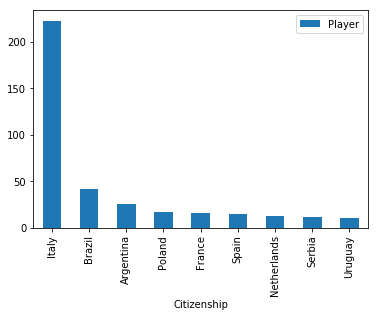

In [31]:
pd.set_option('display.max_rows', 100)
SerieA.groupby('Citizenship')[['Player']].count().sort_values('Player',ascending = False)[:9].plot.bar()

#### Polish Players

In [26]:
SerieA[SerieA.Citizenship=='Poland']

,Player,Value,Age,Position,Number,Club,Citizenship
23,Wojciech Szczesny,36.00,29,Goalkeeper,1,juventus-turin,Poland
28,Arkadiusz Milik,36.00,25,Centre-Forward,99,ssc-napoli,Poland
33,Piotr Zielinski,36.00,25,Central Midfield,20,ssc-napoli,Poland
39,Krzysztof Piatek,28.80,24,Centre-Forward,9,ac-milan,Poland
138,Bartlomiej Dragowski,12.60,22,Goalkeeper,69,ac-florentina,Poland
139,Karol Linetty,12.60,24,Central Midfield,7,uc-sampdoria,Poland
188,Bartosz Bereszynski,7.20,27,Right-Back,24,uc-sampdoria,Poland
217,Lukasz Skorupski,6.30,28,Goalkeeper,28,fc-bologna,Poland
294,Sebastian Walukiewicz,3.60,19,Centre-Back,40,cagliari-calcio,Poland
295,Szymon Zurkowski,3.42,22,Central Midfield,27,ac-florentina,Poland


#### Goalkeeper Ranking

In [47]:
SerieA[SerieA.Position == 'Goalkeeper']

,Player,Value,Age,Position,Number,Club,Citizenship
14,Gianluigi Donnarumma,49.50,20,Goalkeeper,99,ac-milan,Italy
23,Wojciech Szczesny,36.00,29,Goalkeeper,1,juventus-turin,Poland
31,Alex Meret,36.00,22,Goalkeeper,1,ssc-napoli,Italy
56,Thomas Strakosha,22.50,24,Goalkeeper,1,lazio,Albania
64,Pau López,21.60,25,Goalkeeper,13,as-roma,Spain
76,Alessio Cragno,18.00,25,Goalkeeper,28,cagliari-calcio,Italy
112,Ionut Radu,13.50,22,Goalkeeper,97,genoa,Romania
120,Juan Musso,13.50,25,Goalkeeper,1,udinese-calcio,Argentina
134,Emil Audero,13.50,22,Goalkeeper,1,uc-sampdoria,Italy
138,Bartlomiej Dragowski,12.60,22,Goalkeeper,69,ac-florentina,Poland


#### Players Age Distribution

In [32]:
SerieA.Age.describe()

count    541.000000
mean      26.478743
std        4.531986
min       17.000000
25%       23.000000
50%       26.000000
75%       29.000000
max       41.000000
Name: Age, dtype: float64

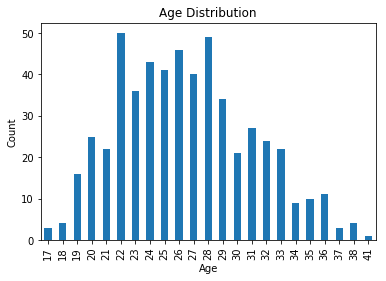

In [36]:
SerieA.groupby('Age')['Player'].count().plot.bar()
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

#### Average Age in Each Team

In [42]:
SerieA.groupby('Club')[['Age']].mean().sort_values('Age',ascending = True)

,Age
Club,
ac-florentina,25.133333
hellas-verona,25.666667
us-sassuolo,25.666667
uc-sampdoria,25.821429
ac-milan,25.846154
udinese-calcio,26.000000
brescia,26.000000
torino,26.461538
lazio,26.516129


#### Club Value Ranking

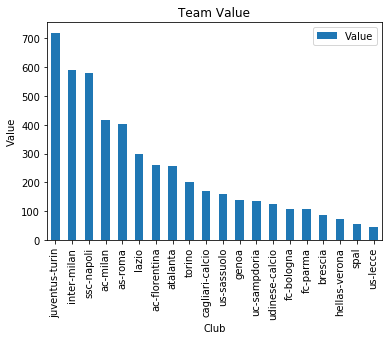

In [46]:
SerieA.groupby('Club')[['Value']].sum().sort_values('Value',ascending = False).plot.bar()
plt.ylabel('Value')
plt.title('Team Value')
plt.show()